<a href="https://colab.research.google.com/github/subramaniannk/TTS/blob/master/Eigenfaces%20classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [139]:
from sklearn.datasets import fetch_lfw_people

lfw_people = fetch_lfw_people(min_faces_per_person=60,resize=0.4)

X = lfw_people.data

y = lfw_people.target

target_names = [lfw_people.target_names[a] for a in y]

n_samples, h, w = lfw_people.images.shape

In [140]:
Bush_images=lfw_people.images[1].flatten()
Bush_labels=[-1]
Blair=target_names[8]
Bush=target_names[1]

In [141]:
Blair_images=lfw_people.images[8].flatten()
Blair_labels=[1]

In [142]:
import numpy as np

In [143]:
for iter in range(2,len(y)):
  if(target_names[iter]==Bush):
    temp=np.array(lfw_people.images[iter].flatten())
    Bush_images=np.vstack((Bush_images,[temp]))
    Bush_labels.append(-1)

In [144]:
for iter in range(9,len(y)):
  if(target_names[iter]==Blair):
    temp=np.array(lfw_people.images[iter].flatten())
    Blair_images=np.vstack((Blair_images,[temp]))
    Blair_labels.append(1)

In [145]:
train_Blair=Blair_images[0:110]
trainBlairLabels=Blair_labels[:110]

In [146]:
test_Blair=Blair_images[110:140]
testBlairLabels=Blair_labels[110:140]

In [147]:
train_Bush=Bush_images[0:110]
trainBushLabels=Bush_labels[:110]

In [148]:
test_Bush=Bush_images[110:140]
testBushLabels=Bush_labels[110:140]

In [149]:
train=np.vstack([train_Blair,train_Bush])
train_labels=np.array(trainBlairLabels+trainBushLabels)

In [150]:
test=np.vstack([test_Blair,test_Bush])
test_labels=np.array(testBlairLabels+testBushLabels)

In [151]:
U, S, VT = np.linalg.svd(train,full_matrices=False)
S = np.diag(S)

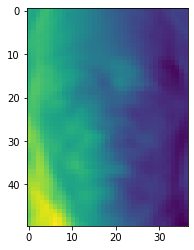

In [152]:
from matplotlib import pyplot as plt
plt.imshow(VT[1,:].reshape(50,37))


In [175]:
feature_space=VT[:20,:]
features_train=(feature_space@(train.T)).T
features_train.shape

(220, 20)

In [176]:
lin_coeff=np.linalg.pinv(features_train)@train_labels

In [177]:
train_predict=np.sign(features_train@lin_coeff)

In [178]:
diff1=np.dot(train_predict,train_labels)

In [179]:
print(diff1)

174.0


In [107]:
print("----------------")

----------------


In [180]:
features_test=(feature_space@(test.T)).T

In [181]:
test_predict=np.sign(features_test@lin_coeff)

In [182]:
diff2=np.dot(test_predict,test_labels)

In [183]:
print(diff2)

42.0


In [184]:
print(test_predict)

[-1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1. -1. -1.  1. -1. -1.  1. -1.
  1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1.  1. -1. -1.  1.]
